### Регуляризация

Запись стрима

[![Запись стрима](https://i.ytimg.com/vi_webp/rrGLCDJD3VM/maxresdefault.webp)](http://www.youtube.com/watch?v=rrGLCDJD3VM "Запист стрима")

Если используется слишком сложная модель, а данных недостаточно, чтобы точно определить ее параметры, эта модель легко может получиться переобученной, то есть хорошо описывать обучающую выборку и плохо — тестовую. Бороться с этим можно различными способами:

- **Взять больше данных.** Такой вариант обычно недоступен, поскольку дополнительные данные стоят дополнительных денег, а также иногда недоступны совсем. Например, в задачах веб-поиска, несмот- ря на наличие терабайтов данных, эффективный объем выборки, описывающей персонализированные данные, существенно ограничен: в этом случае можно использовать только историю посещений данного пользователя.

- **Выбрать более простую модель** или упростить модель, например исключив из рассмотрения неко- торые признаки. Процесс отбора признаков представляет собой нетривиальную задачу. В частности, не понятно, какой из двух похожих признаков следует оставлять, если признаки сильно зашумлены.

- **Использовать регуляризацию**. Ранее было показано, что у переобученной линейной модели значения весов в модели становятся огромными и разными по знаку. Если ограничить значения весов модели, то с переобучением можно до какой-то степени побороться.

Регуляризация - метод добавления некоторой дополнительной информации к условию с целью решить некорректно поставленную задачу или предотвратить переобучение.

## $L_1$ - регуляризация и $L_2$ регуляризация


Есть несколько способов проветси регуляризацию:
- $L_2$ регуляризатор (ridge-регрессия или гребневая регрессия):

$$ w_* = \text{argmin}_w ( \frac{1}{l} \sum\limits_{i=1}^l ( \langle w_i,x_i\rangle- y_i) ^2 + \lambda \sum\limits_{j=1}^d w_j^2) $$


- $L_1$ регуляризатор (lasso-регрессия или лассо-регрессия):


$$ w_* = \text{argmin}_w (\frac{1}{l} \sum\limits_{i=1}^l ( \langle w_i,x_i\rangle- y_i) ^2 + \lambda \sum\limits_{j=1}^d |w_j|) $$


Понять различия между $L_1$ и $L_2$ регулязаторами можно на модельном примере. Пусть матрица «объекты– признаки» X является единичной матрицей размера $ l x l$ :

$$ X = \begin{pmatrix}
   1 & 0 & .. & 0 \\
   0 & 0 & .. & 0 \\
   ... & .. & .. & ... \\
   1 & 1 & .. & 1 \\
\end{pmatrix}
$$

Тогда при решении задачи линейной регрессии использование метода наименьших квадратов без регуляризации:

$$ w_* = \text{argmin}_w \sum\limits_{i=1}^l ( w_i -  y_i) ^2 $$


Дает следующий вектор весов:


$$ w_{*j} = y_j $$

При использовании гребневой регуляризации ($L_2$ –регуляризация) компоненты вектора весов имеют вид:

$$ w_{*j} = \frac{ y_j} {1 + \lambda}  $$

а при использовании $L_1 $–регуляризатора (lasso):

$$
w_*j = \begin{cases} y_i - \lambda/2, & y_i>\lambda/2 \\
        y_i+\lambda/2, & y_i > -\lambda/2  \\ 0, & |y_i| <= -\lambda/2  \end{cases}
$$

При использовании только МНК без регуляризации $w_{∗j} = y_j$ . Соответствующая линия изображена пунк- тиром на обоих графиках. При использовании $L_2$ регуляризации зависимость $w_{∗j}$ от $y_j$ все еще линейная, компоненты вектора весов ближе расположены к нулю.

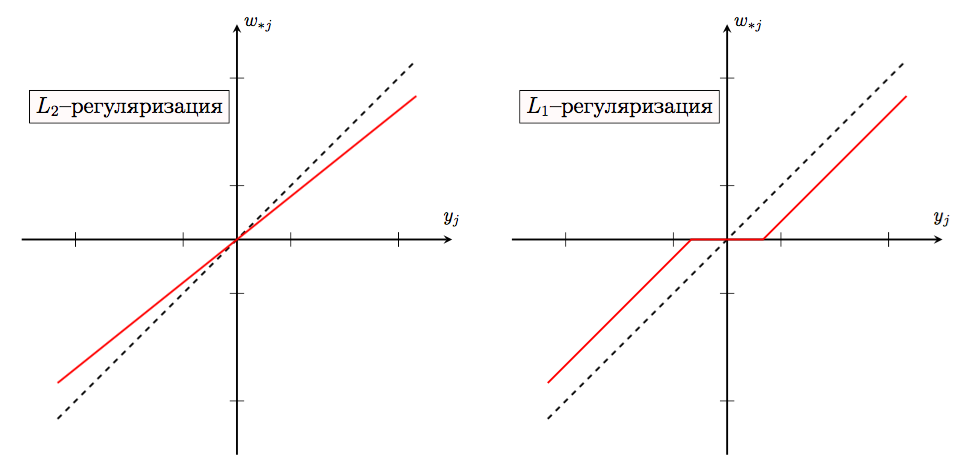

В случае $L_1$ регуляризации график выглядит несколько иначе: существует область (размера $\lambda$) значений $\lambda$ , для которых $w_j = 0$. То есть lasso, или $L_1$ –регуляризация, позволяет отбирать признаки, а именно: веса признаков, обладающих низкой предсказательной способностью, оказываются равными нулю.

### Регрессия LASSO и RIDGE

Метод регрессии лассо (LASSO, Least Absolute Shrinkage and Selection Operator) — это вариация линейной регрессии, специально адаптированная для данных, которые демонстрируют сильную мультиколлинеарность (то есть сильную корреляцию признаков друг с другом).

Она автоматизирует части выбора модели, такие как выбор переменных или исключение параметров. LASSO использует сжатие коэффициентов (shrinkage), то есть процесс, в котором значения данных приближаются к центральной точке (например среднему значению).

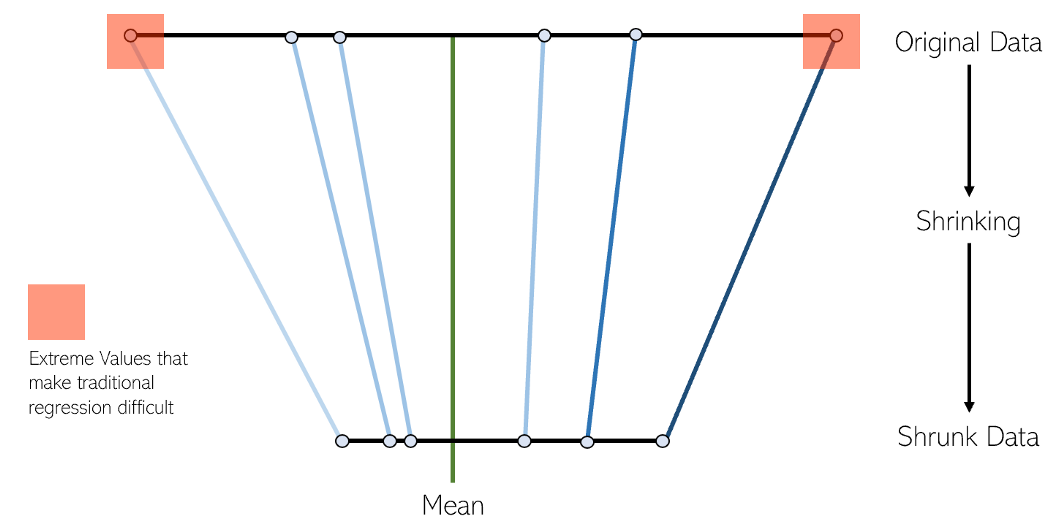

Процесс сжатия добавляет регрессионным моделям несколько преимуществ:
- Более точные и стабильные оценки истинных параметров.
- Уменьшение ошибок выборки и отсутствия выборки.
- Сглаживание пространственных флуктуаций.

Вместо того чтобы корректировать сложность модели, компенсируя сложность данных, подобно методам регрессии с высокой дисперсией нейронных сетей и дерева решений, лассо пытается уменьшить сложность данных так, чтобы их можно было обрабатывать простыми методами регрессии, искривляя пространство, на котором они лежат. В этом процессе лассо автоматически помогает устранить или исказить сильно коррелированные и избыточные функции в методе с низкой дисперсией.

Регрессия лассо использует регуляризацию L1, то есть взвешивает ошибки по их абсолютному значению. Вместо, например, регуляризации L2, которая взвешивает ошибки по их квадрату, чтобы сильнее наказывать за более значительные ошибки.

Такая регуляризация часто приводит к более разреженным моделям с меньшим количеством коэффициентов, так как некоторые коэффициенты могут стать нулевыми и, следовательно, будут исключены из модели. Это позволяет ее интерпретировать.

Гребневая регрессия или ридж-регрессия очень похожа на регрессию LASSO в том, что она применяет сжатие. Оба алгоритма хорошо подходят для наборов данных с большим количеством признаков, которые не являются независимыми друг от друга (коллинеарность).

Однако самое большое различие между ними в том, что гребневая регрессия использует регуляризацию L2, то есть ни один из коэффициентов не становится нулевым, как это происходит в регрессии LASSO. Вместо этого коэффициенты всё больше приближаются к нулю, но не имеют большого стимула достичь его из-за природы регуляризации L2.

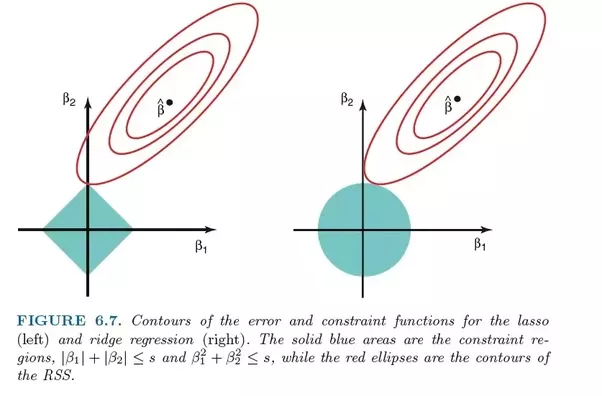
Сравнение ошибок в регрессии лассо (слева) и гребневой регрессии (справа). Поскольку гребневая регрессия использует регуляризацию L2, ее площадь напоминает круг, тогда как регуляризация лассо L1 рисует прямые линии

В лассо улучшение от ошибки 5 до ошибки 4 взвешивается так же, как улучшение от 4 до 3, а также от 3 до 2, от 2 до 1 и от 1 до 0. Следовательно, больше коэффициентов достигает нуля и устраняется больше признаков.

Однако в гребневой регрессии улучшение от ошибки 5 до ошибки 4 вычисляется как 5² − 4² = 9, тогда как улучшение от 4 до 3 взвешивается только как 7. Постепенно вознаграждение за улучшение уменьшается; следовательно, устраняется меньше признаков.

Гребневая регрессия лучше подходит в ситуации, когда мы хотим сделать приоритетными большое количество переменных, каждая из которых имеет небольшой эффект. Если в модели требуется учитывать несколько переменных, каждая из которых имеет средний или большой эффект, лучшим выбором будет лассо.

In [ ]:
!pip install sklearn

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model, datasets, metrics, model_selection
import matplotlib.pyplot as plt

In [187]:
X, y = datasets.make_regression(n_samples=1000, n_features=10, noise=3, shuffle=True)

In [189]:
X[0]

array([-1.54135236, -1.31834729,  1.13103517,  1.10545272, -0.20954022,
        0.88292581, -0.95008611,  1.94561303, -1.56962165,  0.6133237 ])

In [190]:
# test and train data sizes
train_size = 700
test_size = 300

# split the data into training/testing sets
X_train = X[:-train_size]
X_test = X[-test_size:]

# split the targets into training/testing sets
y_train = y[:-train_size]
y_test = y[-test_size:]

<ipython-input-191-e3897aa0821c>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


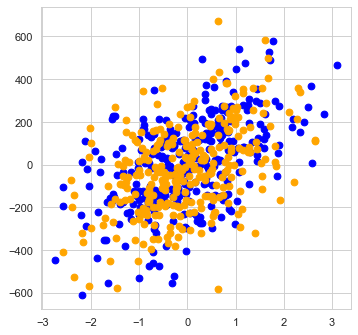

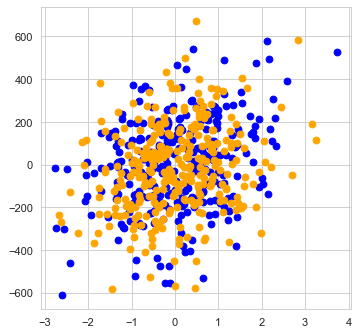

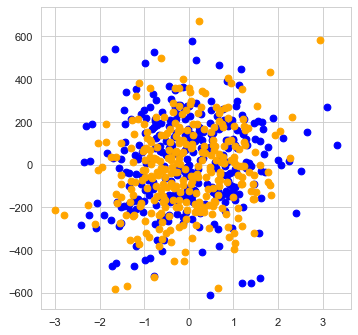

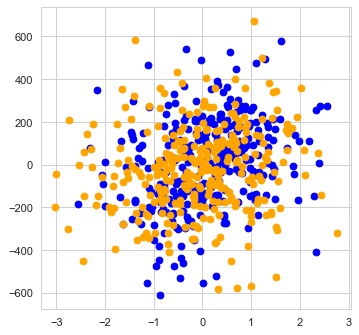

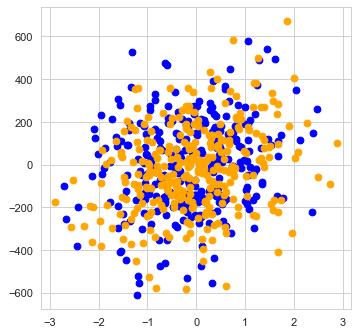

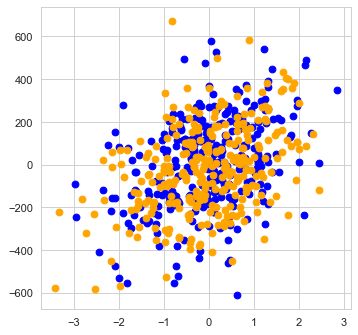

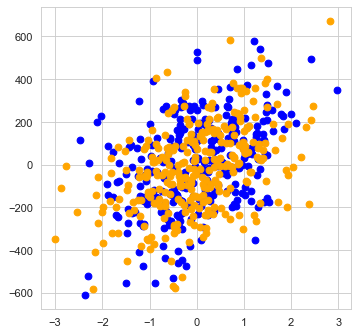

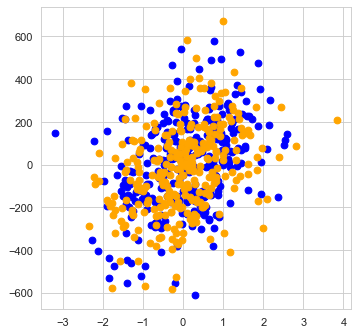

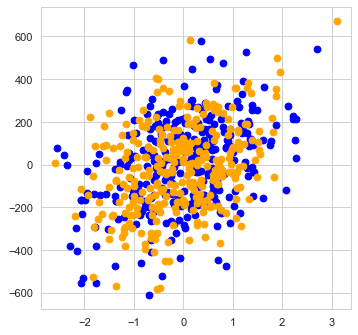

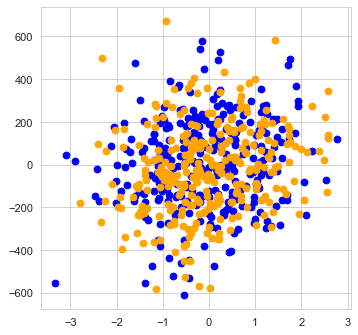

In [191]:
for i in range(10):
    fig = plt.figure(figsize=(5, 5), dpi=80)
    ax = fig.add_subplot()
    ax.scatter(X_train[:, i], y_train, color='blue')
    ax = fig.add_subplot()
    ax.scatter(X_test[:, i], y_test, color='orange')

In [192]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [178]:
metrics.mean_squared_error(y_test, lr_preds)

8.85835157726851

In [193]:
lr.coef_

array([89.23999915, 59.93588424, 37.23147775, 40.82557557, 36.87641309,
       90.85843452, 88.28781043, 61.77323344, 79.74403762, 17.56449396])

In [203]:
ridge_reg = linear_model.Ridge(alpha=1000000)
ridge_reg.fit(X_train, y_train)
ridge_preds = ridge_reg.predict(X_test)

In [204]:
metrics.mean_squared_error(y_test, ridge_preds)

42117.77646960278

In [205]:
ridge_reg.coef_

array([0.03478761, 0.02089417, 0.00639567, 0.01592284, 0.01192755,
       0.02361934, 0.02536656, 0.02292784, 0.0232365 , 0.00893684])

In [216]:
lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
lasso_preds = lasso_reg.predict(X_test)

In [217]:
metrics.mean_squared_error(y_test, lasso_preds)

9.405384617954557

In [218]:
lasso_reg.coef_

array([89.1851201 , 59.8311125 , 37.10958246, 40.72053703, 36.76626236,
       90.74566314, 88.18023461, 61.68731963, 79.65791421, 17.47110721])

In [209]:
lr.coef_

array([89.23999915, 59.93588424, 37.23147775, 40.82557557, 36.87641309,
       90.85843452, 88.28781043, 61.77323344, 79.74403762, 17.56449396])

## Домашнее задание

Применить 3 модели:
- Линейная регрессия
- Лассо-регрессия
- Ридж-регрессия


К подготовленому датасету по предсказанию стоимости домиков и выбрать наилучшую
